#### UCI Data Analytics -- Project 1: CRIME DATA ANALYSIS -- Maria Barrera -- 02/02/2021

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# File to Load (Remember to Change These)
domestic_violence_data_to_load = "Data/DVRCA_2001-2019.csv"
usa_cities_data_to_load = "Data/US-Cities.csv"
CA_liquor_data_to_load = "Data/CA-ABC-LicenseReport-MasterActiveOnly.csv"
CA_county_pop_data_to_load = "Data/CA_CountyPop_2009to2019.csv"

print(domestic_violence_data_to_load)
print()
print(usa_cities_data_to_load)
print()
print(CA_liquor_data_to_load)
print()
print(CA_county_pop_data_to_load)
print()

Data/DVRCA_2001-2019.csv

Data/US-Cities.csv

Data/CA-ABC-LicenseReport-MasterActiveOnly.csv

Data/CA_CountyPop_2009to2019.csv



In [3]:
# Read Domestic Violence Data File and store into Pandas DataFrame
dom_viol_df = pd.read_csv(domestic_violence_data_to_load)
dom_viol_df

,YEAR,COUNTY,AGENCY_NAME,MONTH,TOTAL_CALLS,NO_WEAPONS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
0,2001,Alameda County,Alameda,4,15,0,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,0,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,0,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,0,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,0,19,0,0,0,19,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157861,2019,Kings County,Hanford,6,28,22,6,0,0,0,6,0,2.0,1.0,1.0
157862,2019,Contra Costa County,San Ramon,7,11,5,6,0,0,2,4,0,0.0,0.0,0.0
157863,2019,Napa County,St. Helena,7,2,1,1,0,0,0,1,0,0.0,0.0,0.0
157864,2019,Orange County,Garden Grove,7,31,5,26,0,0,1,25,0,3.0,2.0,1.0


In [4]:
# Read US Cities Data File and store into Pandas DataFrame
usa_cities_df = pd.read_csv(usa_cities_data_to_load)
usa_cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [5]:
CA_liquor_df = pd.read_csv(CA_liquor_data_to_load)
CA_liquor_df.head()

,License Number,Status,License Type,Orig. Iss. Date,Expir. Date,Primary Owner,Premises Addr.,Business Name,Geo Code,County
0,7936,ACTIVE,21,9/14/1971,6/30/2021,"THRIFTY PAYLESS, INC.","2819 HOPYARD RD,PLEASANTON, CA 94588Census Tr...",RITE AID STORE 5944,111,Alameda
1,13085,ACTIVE,21,10/1/1975,5/31/2021,VILLAGE INVESTMENTS INC,"5885 BROADWAY TER,OAKLAND, CA 94618Census Tra...",VILLAGE MARKET,109,Alameda
2,16493,ACTIVE,21,12/26/1934,3/31/2021,PIEDMONT GROCERY CO,"4030-38 PIEDMONT AVE,OAKLAND, CA 94611Census ...",NaN,109,Alameda
3,27679,ACTIVE,21,7/1/1977,9/30/2021,PLAZA BOTTLE SHOP & MARKET INC,"15292 LIBERTY ST,SAN LEANDRO, CA 94578Census ...",PLAZA BOTTLE SHOP & MARKET,112,Alameda
4,42933,ACTIVE,21,3/1/1976,6/30/2021,"THRIFTY PAYLESS, INC.","31091 MISSION BLVD,HAYWARD, CA 94544Census Tr...",RITE AID STORE 5920,106,Alameda


In [6]:
type(dom_viol_df)

pandas.core.frame.DataFrame

In [7]:
# FOR REFERENCE ONLY -- to get easy access of column / field names
dom_viol_df.columns

Index(['YEAR', 'COUNTY', 'AGENCY_NAME', 'MONTH', 'TOTAL_CALLS', 'NO_WEAPONS',
       'WEAPONS_INVOLVED', 'SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER',
       'SUB_PERSONAL', 'WEAPON_NOT_RPT', 'TOTAL_STRANG_SUFFO',
       'SUB_STRANGULATION', 'SUB_SUFFOCATION'],
      dtype='object')

In [8]:
# keep original dataframe and make a copy                                          
new_dom_viol_df=dom_viol_df
new_dom_viol_df.head()

,YEAR,COUNTY,AGENCY_NAME,MONTH,TOTAL_CALLS,NO_WEAPONS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
0,2001,Alameda County,Alameda,4,15,0,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,0,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,0,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,0,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,0,19,0,0,0,19,0,NaN,NaN,NaN


In [9]:
# change headers to lower case
new_dom_viol_df.columns = [x.lower() for x in new_dom_viol_df.columns]
new_dom_viol_df

,year,county,agency_name,month,total_calls,no_weapons,weapons_involved,sub_firearm,sub_knife,sub_other,sub_personal,weapon_not_rpt,total_strang_suffo,sub_strangulation,sub_suffocation
0,2001,Alameda County,Alameda,4,15,0,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,0,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,0,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,0,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,0,19,0,0,0,19,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157861,2019,Kings County,Hanford,6,28,22,6,0,0,0,6,0,2.0,1.0,1.0
157862,2019,Contra Costa County,San Ramon,7,11,5,6,0,0,2,4,0,0.0,0.0,0.0
157863,2019,Napa County,St. Helena,7,2,1,1,0,0,0,1,0,0.0,0.0,0.0
157864,2019,Orange County,Garden Grove,7,31,5,26,0,0,1,25,0,3.0,2.0,1.0


In [10]:
# remove the word 'County' in the values of the county column
new_dom_viol_df['county'] = new_dom_viol_df['county'].str.replace(' County', '')
new_dom_viol_df

,year,county,agency_name,month,total_calls,no_weapons,weapons_involved,sub_firearm,sub_knife,sub_other,sub_personal,weapon_not_rpt,total_strang_suffo,sub_strangulation,sub_suffocation
0,2001,Alameda,Alameda,4,15,0,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda,Alameda,6,14,0,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda,Alameda,10,19,0,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda,Alameda,12,21,0,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda,Alameda,5,19,0,19,0,0,0,19,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157861,2019,Kings,Hanford,6,28,22,6,0,0,0,6,0,2.0,1.0,1.0
157862,2019,Contra Costa,San Ramon,7,11,5,6,0,0,2,4,0,0.0,0.0,0.0
157863,2019,Napa,St. Helena,7,2,1,1,0,0,0,1,0,0.0,0.0,0.0
157864,2019,Orange,Garden Grove,7,31,5,26,0,0,1,25,0,3.0,2.0,1.0


In [11]:
# for testing only
#new_dom_viol_df['county'].iloc[0]

In [12]:
# reference only
new_dom_viol_df.columns

Index(['year', 'county', 'agency_name', 'month', 'total_calls', 'no_weapons',
       'weapons_involved', 'sub_firearm', 'sub_knife', 'sub_other',
       'sub_personal', 'weapon_not_rpt', 'total_strang_suffo',
       'sub_strangulation', 'sub_suffocation'],
      dtype='object')

In [13]:
# reference only
usa_cities_df.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [14]:
# rename column labels
usa_cities_df = usa_cities_df.rename(columns={'county_name': 'county',
                                              'state_name': 'state'})
usa_cities_df.columns

Index(['city', 'city_ascii', 'state_id', 'state', 'county_fips', 'county',
       'lat', 'lng', 'population', 'density', 'source', 'military',
       'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [15]:
cities_subset_df = usa_cities_df.drop(columns=['city_ascii', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis = 1) 
cities_subset_df.head()

,city,state_id,state,county_fips,county,lat,lng,population,density
0,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0
1,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0
2,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0
3,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0
4,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0


In [16]:
# Merge two dataframes using a left join 
complete_df = pd.merge(new_dom_viol_df, cities_subset_df, on = "county", how = "left")
complete_df

,year,county,agency_name,month,total_calls,no_weapons,weapons_involved,sub_firearm,sub_knife,sub_other,...,sub_strangulation,sub_suffocation,city,state_id,state,county_fips,lat,lng,population,density
0,2001,Alameda,Alameda,4,15,0,15,0,0,1,...,NaN,NaN,Oakland,CA,California,6001,37.7903,-122.2165,433031,2991.0
1,2001,Alameda,Alameda,4,15,0,15,0,0,1,...,NaN,NaN,Fremont,CA,California,6001,37.5265,-121.9852,241110,1201.0
2,2001,Alameda,Alameda,4,15,0,15,0,0,1,...,NaN,NaN,Hayward,CA,California,6001,37.6328,-122.0772,159203,1349.0
3,2001,Alameda,Alameda,4,15,0,15,0,0,1,...,NaN,NaN,Berkeley,CA,California,6001,37.8723,-122.2760,121363,4473.0
4,2001,Alameda,Alameda,4,15,0,15,0,0,1,...,NaN,NaN,Livermore,CA,California,6001,37.6862,-121.7608,90923,1288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671567,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Monte Sereno,CA,California,6085,37.2404,-121.9882,3427,806.0
8671568,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Loyola,CA,California,6085,37.3502,-122.0980,3364,911.0
8671569,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Cambrian Park,CA,California,6085,37.2563,-121.9287,3094,1957.0
8671570,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Lexington Hills,CA,California,6085,37.1616,-121.9879,2603,213.0


In [17]:
# select 2019 data only
complete_2019_df = complete_df.loc[(complete_df['year'] == 2019)]
complete_2019_df

,year,county,agency_name,month,total_calls,no_weapons,weapons_involved,sub_firearm,sub_knife,sub_other,...,sub_strangulation,sub_suffocation,city,state_id,state,county_fips,lat,lng,population,density
8192608,2019,Orange,Newport Beach,4,13,13,0,0,0,0,...,3.0,0.0,Orlando,FL,Florida,12095,28.4772,-81.3369,1822394,1003.0
8192609,2019,Orange,Newport Beach,4,13,13,0,0,0,0,...,3.0,0.0,Mission Viejo,CA,California,6059,33.6095,-117.6550,590249,2058.0
8192610,2019,Orange,Newport Beach,4,13,13,0,0,0,0,...,3.0,0.0,Anaheim,CA,California,6059,33.8390,-117.8572,350365,2688.0
8192611,2019,Orange,Newport Beach,4,13,13,0,0,0,0,...,3.0,0.0,Santa Ana,CA,California,6059,33.7366,-117.8819,332318,4689.0
8192612,2019,Orange,Newport Beach,4,13,13,0,0,0,0,...,3.0,0.0,Irvine,CA,California,6059,33.6772,-117.7738,287401,1691.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671567,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Monte Sereno,CA,California,6085,37.2404,-121.9882,3427,806.0
8671568,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Loyola,CA,California,6085,37.3502,-122.0980,3364,911.0
8671569,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Cambrian Park,CA,California,6085,37.2563,-121.9287,3094,1957.0
8671570,2019,Santa Clara,Campbell,7,29,26,3,0,0,1,...,1.0,0.0,Lexington Hills,CA,California,6085,37.1616,-121.9879,2603,213.0


In [18]:
# reference only
complete_2019_df.columns

Index(['year', 'county', 'agency_name', 'month', 'total_calls', 'no_weapons',
       'weapons_involved', 'sub_firearm', 'sub_knife', 'sub_other',
       'sub_personal', 'weapon_not_rpt', 'total_strang_suffo',
       'sub_strangulation', 'sub_suffocation', 'city', 'state_id', 'state',
       'county_fips', 'lat', 'lng', 'population', 'density'],
      dtype='object')

In [19]:
## group by county & get total weapons involved for 2019
grpby_county_totalcalls_df = complete_2019_df.groupby(["county"]).agg({"total_calls": "sum"}) 
grpby_county_totalcalls_df.head() 

,total_calls
county,
Alameda,118880
Alpine,24
Amador,1904
Butte,41876
Calaveras,3536


In [20]:
# create a subset for only these counties for 2019
selected_counties = ['Alameda', 'Los Angeles', 'Monterey', 'Napa', 'Orange', 'Riverside', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Clara']

subset_bycounty_totalcalls_df = grpby_county_totalcalls_df.loc[selected_counties]
subset_bycounty_totalcalls_df

,total_calls
county,
Alameda,118880
Los Angeles,5138980
Monterey,48552
Napa,4890
Orange,1525942
Riverside,517680
San Bernardino,396831
San Diego,924108
San Francisco,3447


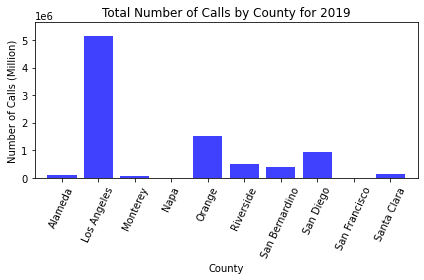

<function matplotlib.pyplot.close(fig=None)>

In [21]:
# bar chart using pyplot -- for total calls by county for 2019

# USE: subset_county_totalcalls_df -- only 10 counties

y = subset_bycounty_totalcalls_df['total_calls']

x_axis = np.arange(0, len(selected_counties))

# Tell matplotlib that chart to be created is a bar chart
# Apply align="edge" to ensure the bars line up with the tick marks
plt.bar(x_axis, y, facecolor="blue", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
#plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xticks(tick_locations, selected_counties, rotation=65)

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(y)+500000, +1000)

# Set a Title and labels
plt.title("Total Number of Calls by County for 2019")
plt.xlabel("County")
plt.ylabel("Number of Calls (Million)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/mb_totalcallsbycounty2019.png")

plt.show()

plt.close

In [22]:
## group by county & get total weapons involved for ALL counties for 2019
grpby_county_totalweapons_df = complete_2019_df.groupby(["county"]).agg({"weapons_involved": "sum"}) 
grpby_county_totalweapons_df.head()    

,weapons_involved
county,
Alameda,32520
Alpine,24
Amador,629
Butte,18088
Calaveras,512


In [23]:
grpby_county_totalweapons_df.columns

Index(['weapons_involved'], dtype='object')

In [24]:
# create a subset for SELECTED counties only
selected_counties = ['Alameda', 'Los Angeles', 'Monterey', 'Napa', 'Orange', 'Riverside', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Clara']

subset_county_weapons_df = grpby_county_totalweapons_df.loc[selected_counties]
subset_county_weapons_df

,weapons_involved
county,
Alameda,32520
Los Angeles,4020100
Monterey,7896
Napa,940
Orange,308858
Riverside,205488
San Bernardino,216750
San Diego,614694
San Francisco,2697


In [25]:
counties_weapons = pd.unique(subset_county_weapons_df['weapons_involved'])
counties_weapons   

array([  32520, 4020100,    7896,     940,  308858,  205488,  216750,
        614694,    2697,   21321], dtype=int64)

In [26]:
subset_county_weapons_df

,weapons_involved
county,
Alameda,32520
Los Angeles,4020100
Monterey,7896
Napa,940
Orange,308858
Riverside,205488
San Bernardino,216750
San Diego,614694
San Francisco,2697


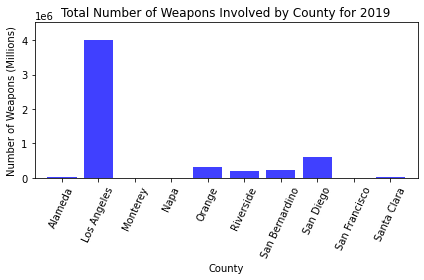

<function matplotlib.pyplot.close(fig=None)>

In [27]:
# create weapons involved by county bar graph using pyplot

#ref: weapons_by_county_count -- all counties

# subset_county_weapons_df -- only 10 counties
#counties_weapons                    

x_axis = np.arange(0, len(selected_counties))

# Tell matplotlib that chart to be created is a bar chart
# Apply align="edge" to ensure the bars line up with the tick marks
plt.bar(x_axis, counties_weapons, facecolor="blue", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
#plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xticks(tick_locations, selected_counties, rotation=65)

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(counties_weapons)+500000, +100000)

# Set a Title and labels
plt.title("Total Number of Weapons Involved by County for 2019")
plt.xlabel("County")
plt.ylabel("Number of Weapons (Millions)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/mb_weaponsinvolvedbycounty2019.png")

plt.show()

plt.close

In [28]:
# group by year
weaponsbyyear_df = complete_df.groupby('year').agg({'weapons_involved': 'sum'})
weaponsbyyear_df

,weapons_involved
year,
2001,10265297
2002,9230740
2003,8470986
2004,7723906
2005,7303732
2006,6380935
2007,5618785
2008,5441242
2009,5500374


In [29]:
years = pd.unique(complete_df["year"])
years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [30]:
num_weapons = []
num_weapons = complete_df.groupby(['year']).agg({'weapons_involved': 'count'})
num_weapons_by_yr = weaponsbyyear_df['weapons_involved']
num_weapons_by_yr

year
2001    10265297
2002     9230740
2003     8470986
2004     7723906
2005     7303732
2006     6380935
2007     5618785
2008     5441242
2009     5500374
2010     5359595
2011     5079445
2012     5252246
2013     5067069
2014     5328607
2015     5642093
2016     5807008
2017     6064964
2018     6318481
2019     6134989
Name: weapons_involved, dtype: int64

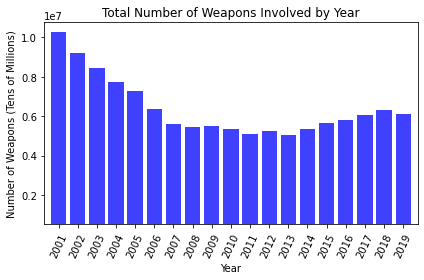

<function matplotlib.pyplot.close(fig=None)>

In [31]:
# bar chart using pyplot

x_axis = np.arange(0, len(years))

# Tell matplotlib that chart to be created is a bar chart
# Apply align="edge" to ensure the bars line up with the tick marks
plt.bar(x_axis, num_weapons_by_yr, facecolor="blue", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
plt.xticks(tick_locations, years, rotation=65)

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(500000, max(num_weapons_by_yr)+500000, +500000)

# Set a Title and labels
plt.title("Total Number of Weapons Involved by Year")
plt.xlabel("Year")
plt.ylabel("Number of Weapons (Tens of Millions)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/mb_weaponsinvolvedbyyr.png")

plt.show()

plt.close


In [32]:
CA_liquor_df.columns

Index(['License Number', 'Status', 'License Type', 'Orig. Iss. Date',
       'Expir. Date', 'Primary Owner', 'Premises Addr.', 'Business Name',
       'Geo Code', 'County'],
      dtype='object')

In [33]:
# identify the unique county names
counties_liquor = pd.unique(CA_liquor_df['County'])
counties_liquor                     

array(['Alameda', 'Los Angeles', 'Monterey', 'Napa', 'Orange',
       'Riverside', 'San Bernardino', 'San Diego', 'San Francisco',
       'Santa Clara'], dtype=object)

In [34]:
# count number of liquor stores by county
num_liquor_stores_by_county = CA_liquor_df.groupby(['County']).agg({'License Number': 'count'})

# rename column
num_liquor_stores_by_county = num_liquor_stores_by_county.rename(columns={'License Number': 'Liquor License Count'})
num_liquor_stores_by_county

,Liquor License Count
County,
Alameda,997
Los Angeles,6061
Monterey,397
Napa,718
Orange,1832
Riverside,1334
San Bernardino,1467
San Diego,1990
San Francisco,743


In [35]:
lic_count = num_liquor_stores_by_county['Liquor License Count']
lic_count

County
Alameda            997
Los Angeles       6061
Monterey           397
Napa               718
Orange            1832
Riverside         1334
San Bernardino    1467
San Diego         1990
San Francisco      743
Santa Clara        955
Name: Liquor License Count, dtype: int64

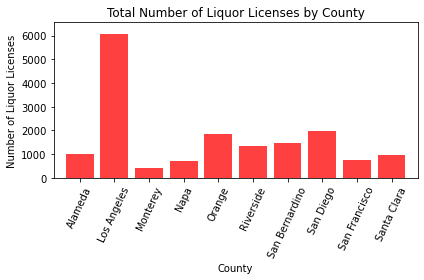

<function matplotlib.pyplot.close(fig=None)>

In [36]:
# create license count bar graph using pyplot

x_axis = np.arange(0, len(lic_count))

# Tell matplotlib that chart to be created is a bar chart
# Apply align="edge" to ensure the bars line up with the tick marks
plt.bar(x_axis, lic_count, facecolor="red", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
#plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xticks(tick_locations, counties_liquor, rotation=65)

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(lic_count)+500, +1000)

# Set a Title and labels
plt.title("Total Number of Liquor Licenses by County")
plt.xlabel("County")
plt.ylabel("Number of Liquor Licenses")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/mb_numberofliquorlicensesbycounty.png")

plt.show()

plt.close

In [37]:
# Read CA County Population Data File and store into Pandas DataFrame
ca_county_pop_df = pd.read_csv(CA_county_pop_data_to_load)
ca_county_pop_df

,Unnamed: 0,NAME,Population,stateNo,countyNo,County,Year
0,0,"Alameda County, California",1457095,6,1,Alameda,2009
1,1,"Alpine County, California",1153,6,3,Alpine,2009
2,2,"Amador County, California",38039,6,5,Amador,2009
3,3,"Butte County, California",217917,6,7,Butte,2009
4,4,"Calaveras County, California",46548,6,9,Calaveras,2009
...,...,...,...,...,...,...,...
633,633,"Mendocino County, California",87224,6,45,Mendocino,2019
634,634,"Los Angeles County, California",10081570,6,37,Los Angeles,2019
635,635,"Santa Clara County, California",1927470,6,85,Santa Clara,2019
636,636,"Siskiyou County, California",43468,6,93,Siskiyou,2019


In [38]:
# select 2019 population data only
ca_county_pop_2019_df = ca_county_pop_df.loc[(ca_county_pop_df['Year'] == 2019)]
ca_county_pop_2019_df.head()

,Unnamed: 0,NAME,Population,stateNo,countyNo,County,Year
580,580,"Merced County, California",271382,6,47,Merced,2019
581,581,"Mariposa County, California",17420,6,43,Mariposa,2019
582,582,"Modoc County, California",8907,6,49,Modoc,2019
583,583,"Contra Costa County, California",1142251,6,13,Contra Costa,2019
584,584,"Inyo County, California",17977,6,27,Inyo,2019


In [39]:
ca_county_pop_2019_df.sort_values(by = 'County')
ca_county_pop_2019_df.head()

,Unnamed: 0,NAME,Population,stateNo,countyNo,County,Year
580,580,"Merced County, California",271382,6,47,Merced,2019
581,581,"Mariposa County, California",17420,6,43,Mariposa,2019
582,582,"Modoc County, California",8907,6,49,Modoc,2019
583,583,"Contra Costa County, California",1142251,6,13,Contra Costa,2019
584,584,"Inyo County, California",17977,6,27,Inyo,2019


In [40]:
# create a subset for SELECTED counties only
selected_counties = ['Alameda', 'Los Angeles', 'Monterey', 'Napa', 'Orange', 
                     'Riverside', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Clara']

#subset_county_pop_df = ca_county_pop_2019_df[ca_county_pop_2019_df['County'].isin (selected_counties)]

subset_county_pop_df = ca_county_pop_2019_df.loc[ca_county_pop_2019_df['County'].isin 
                                                 (selected_counties), ['County', 'Population']]
subset_county_pop_df

,County,Population
592,Monterey,433410
593,San Francisco,874961
594,San Diego,3316073
601,Riverside,2411439
602,San Bernardino,2149031
615,Orange,3168044
628,Alameda,1656754
629,Napa,139623
634,Los Angeles,10081570
635,Santa Clara,1927470


In [41]:
# sort by County
subset_county_pop_df.sort_values(by=['County', 'Population'], inplace=True)
subset_county_pop_df

,County,Population
628,Alameda,1656754
634,Los Angeles,10081570
592,Monterey,433410
629,Napa,139623
615,Orange,3168044
601,Riverside,2411439
602,San Bernardino,2149031
594,San Diego,3316073
593,San Francisco,874961
635,Santa Clara,1927470


In [42]:
type(subset_county_pop_df)

pandas.core.frame.DataFrame

In [43]:
# county population list
county_pop = subset_county_pop_df['Population']
county_pop

628     1656754
634    10081570
592      433410
629      139623
615     3168044
601     2411439
602     2149031
594     3316073
593      874961
635     1927470
Name: Population, dtype: int64

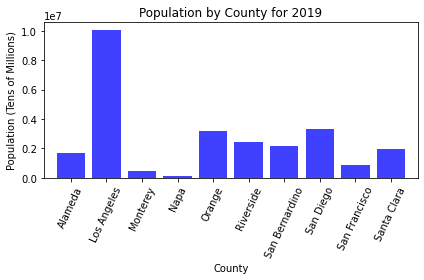

<function matplotlib.pyplot.close(fig=None)>

In [44]:
# create 2019 population by county bar graph using pyplot

x_axis = np.arange(0, len(county_pop))

# Tell matplotlib that chart to be created is a bar chart
# Apply align="edge" to ensure the bars line up with the tick marks
plt.bar(x_axis, county_pop, facecolor="blue", alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

# pass in the tick location and the label you want to appear on the ticks (in order)
#plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xticks(tick_locations, counties_liquor, rotation=65)

# Sets the x limits of the current chart
# using len(x_axis)-0.25 will go to the last value in your x-axis and come back a small amount. 
# This is based on the size of your data

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(county_pop)+500000, +1000)

# Set a Title and labels
plt.title("Population by County for 2019")
plt.xlabel("County")
plt.ylabel("Population (Tens of Millions)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/mb_populationbycounty2019.png")

plt.show()

plt.close